# Softmax exercise

In [ ]:
def softmax_loss_naive(W, X, y, reg):
    """
    Softmax loss function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)
    num_classes = W.shape[1]
    num_train = X.shape[0]

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using explicit loops.     #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    for i in range(num_train):
        scores = X[i].dot(W)
        softmax = np.exp(scores[y[i]])/np.sum(np.exp(scores))
        loss += -np.log(softmax)

        for j in range(num_classes):
          dW[:, j] +=  X[i] * softmax
        dW[:, y[i]] -= X[i]

    loss /= num_train
    dW /= num_train
    loss += reg * np.sum(W * W)
    dW += 2*reg*W

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW

**Softmax loss (cross-entropy)**

>$Loss=\frac{1}{N}\sum_{i}L_{i}(f(x_{i},w),y_{i})$  
>
>$L_{i} = -log(\frac{e^{f_{y_{i}}}}{\sum_{j}e^{f_{j}}})$  
>
>$L_{i} = -f_{y_{i}} + log∑_{j}e^{f_{j}} $  
$L_{i} = - w^T_{y_i}x_{i} + log∑_{j}e^{w^T_{j}x_{i}} $

**Softmax gradient**

>$ \frac{dL_{i}}{dw_{y_{i}}} = -x_{i}$  
$ \frac{dL_{i}}{dw_{j}} = \frac{e^{w^T_{j}x_{i}}*x_{i}}{∑_{j}e^{w^T_{j}x_{i}}}$

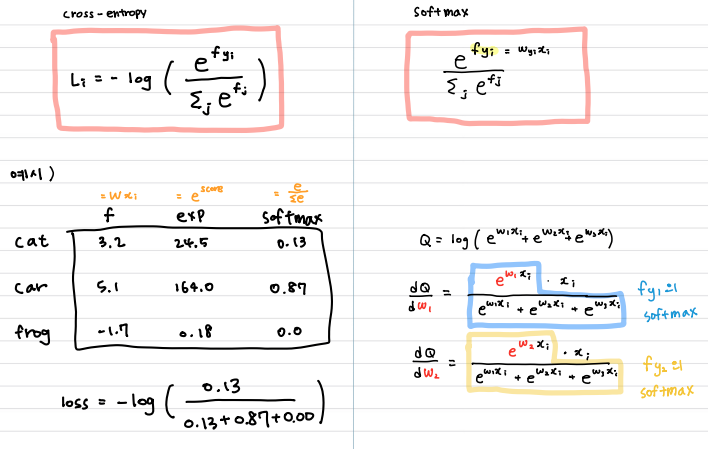

In [ ]:
def softmax_loss_vectorized(W, X, y, reg):
    """
    Softmax loss function, vectorized version.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)
    num_train = X.shape[0]

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using no explicit loops.  #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    f = X.dot(W)
    exp = np.exp(f)
    correct_class = exp[range(num_train),y]
    exp_sum = np.sum(exp,axis=1)

    softmax = correct_class/exp_sum
    loss = np.sum(-np.log(softmax))
    
    softmax = exp/exp_sum.reshape(-1,1)
    dW = X.T.dot(softmax)
    mask = np.zeros_like(exp)
    mask[range(num_train),y] = 1
    dW -= X.T.dot(mask)

    loss /= num_train
    dW /= num_train
    loss += reg * np.sum(W * W)
    dW += 2*reg*W

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW


<img src="note/softmax_vectorization.PNG" title="svm"/>